In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from scipy import stats

In [2]:
df = pd.read_csv(r'C:\Users\Sandeep Immadi\Downloads\insurance_part2_data.csv')
df

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2995,28,CWT,Travel Agency,Yes,166.53,Online,364,256.20,Gold Plan,Americas
2996,35,C2B,Airlines,No,13.50,Online,5,54.00,Gold Plan,ASIA
2997,36,EPX,Travel Agency,No,0.00,Online,54,28.00,Customised Plan,ASIA
2998,34,C2B,Airlines,Yes,7.64,Online,39,30.55,Bronze Plan,ASIA


In [3]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [4]:
df.tail()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
2995,28,CWT,Travel Agency,Yes,166.53,Online,364,256.20,Gold Plan,Americas
2996,35,C2B,Airlines,No,13.50,Online,5,54.00,Gold Plan,ASIA
2997,36,EPX,Travel Agency,No,0.00,Online,54,28.00,Customised Plan,ASIA
2998,34,C2B,Airlines,Yes,7.64,Online,39,30.55,Bronze Plan,ASIA
2999,47,JZI,Airlines,No,11.55,Online,15,33.00,Bronze Plan,ASIA


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00


In [7]:
df.columns

Index(['Age', 'Agency_Code', 'Type', 'Claimed', 'Commision', 'Channel',
       'Duration', 'Sales', 'Product Name', 'Destination'],
      dtype='object')

In [8]:
df.dtypes

Age               int64
Agency_Code      object
Type             object
Claimed          object
Commision       float64
Channel          object
Duration          int64
Sales           float64
Product Name     object
Destination      object
dtype: object

In [9]:
df.isna().values.sum()

0

In [10]:
df.shape

(3000, 10)

In [11]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 139


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


In [12]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,3000,NaN,NaN,NaN,38.091,10.4635,8,32,36,42,84
Agency_Code,3000,4,EPX,1365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,3000,2,Travel Agency,1837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,3000,2,No,2076,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,3000,NaN,NaN,NaN,14.5292,25.4815,0,0,4.63,17.235,210.21
Channel,3000,2,Online,2954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,3000,NaN,NaN,NaN,70.0013,134.053,-1,11,26.5,63,4580
Sales,3000,NaN,NaN,NaN,60.2499,70.734,0,20,33,69,539
Product Name,3000,5,Customised Plan,1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,3000,3,ASIA,2465,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.skew()

Age           1.149713
Commision     3.148858
Duration     13.784681
Sales         2.381148
dtype: float64

In [14]:
df.kurt()

Age            1.652124
Commision     13.984825
Duration     427.587926
Sales          6.155248
dtype: float64

<AxesSubplot:>

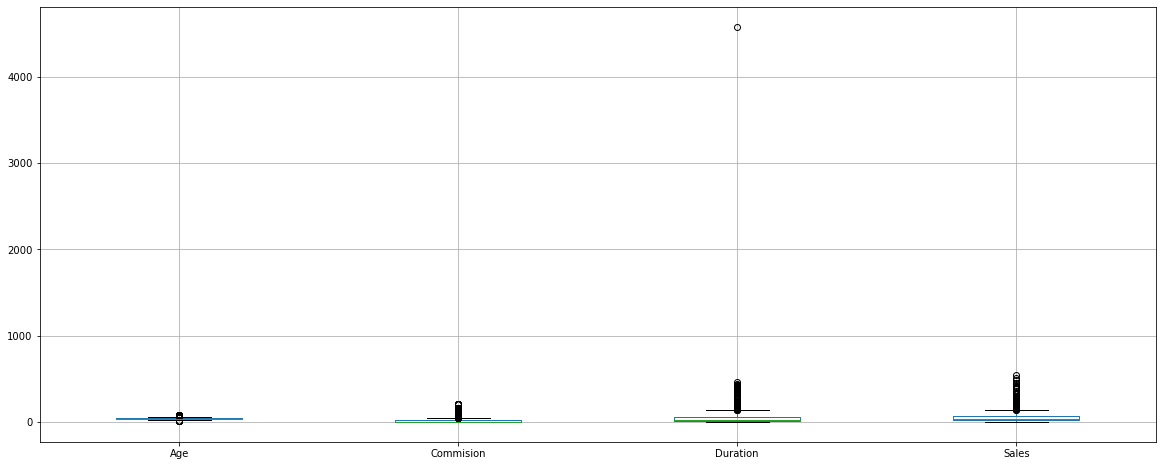

In [15]:
plt.figure(figsize = (20,8))
df.boxplot()

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Commision'}>],
       [<AxesSubplot:title={'center':'Duration'}>,
        <AxesSubplot:title={'center':'Sales'}>]], dtype=object)

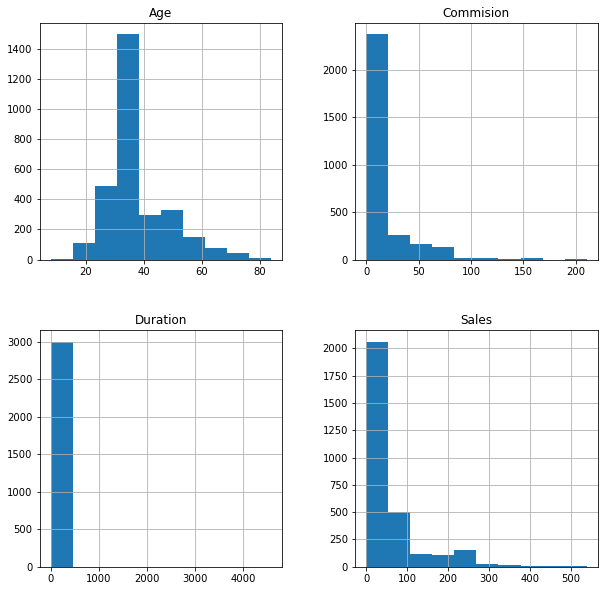

In [18]:
df.hist(figsize=(10,10))

In [4]:
for column in df[['Agency_Code', 'Type', 'Claimed', 'Channel', 
                  'Product Name', 'Destination']]:
    print(column.upper(),': ',df[column].nunique())
    print(df[column].value_counts().sort_values())


AGENCY_CODE :  4
JZI     239
CWT     472
C2B     924
EPX    1365
Name: Agency_Code, dtype: int64
TYPE :  2
Airlines         1163
Travel Agency    1837
Name: Type, dtype: int64
CLAIMED :  2
Yes     924
No     2076
Name: Claimed, dtype: int64
CHANNEL :  2
Offline      46
Online     2954
Name: Channel, dtype: int64
PRODUCT NAME :  5
Gold Plan             109
Silver Plan           427
Bronze Plan           650
Cancellation Plan     678
Customised Plan      1136
Name: Product Name, dtype: int64
DESTINATION :  3
EUROPE       215
Americas     320
ASIA        2465
Name: Destination, dtype: int64


In [19]:
# Age
df['Age'].max()-df['Age'].min()
Q1=df['Age'].quantile(q=0.25)
Q3=df['Age'].quantile(q=0.75)
print('Q1 of Age  is: ', Q1)
print('Q3 of Age  is: ', Q3)
print('IQR of Age is ', stats.iqr(df['Age']))
L_ol=Q1-1.5*(Q3-Q1)
U_ol=Q3+1.5*(Q3-Q1)
print('Threshold for lower outliers in Age is: ', L_ol)
print('Threshold for upper outliers in Age is: ', U_ol)
print('No. of outliers in Age upper : ', df[df['Age']>57.0]['Age'].count())
print('No. of outliers in Age lower : ', df[df['Age']< 17.0]['Age'].count())

Q1 of Age  is:  32.0
Q3 of Age  is:  42.0
IQR of Age is  10.0
Threshold for lower outliers in Age is:  17.0
Threshold for upper outliers in Age is:  57.0
No. of outliers in Age upper :  198
No. of outliers in Age lower :  6


In [21]:
# Commision
df['Commision'].max()-df['Commision'].min()
Q1=df['Commision'].quantile(q=0.25)
Q3=df['Commision'].quantile(q=0.75)
print('Q1 of Commision  is: ', Q1)
print('Q3 of Commision  is: ', Q3)
print('IQR of Commision is ', stats.iqr(df['Commision']))
L_ol=Q1-1.5*(Q3-Q1)
U_ol=Q3+1.5*(Q3-Q1)
print('Threshold for lower outliers in Commision is: ', L_ol)
print('Threshold for upper outliers in Commision is: ', U_ol)
print('No. of outliers in Commision upper : ', df[df['Commision']>43.0875]['Commision'].count())
print('No. of outliers in Commision lower : ', df[df['Commision']<-25.8525]['Commision'].count())

Q1 of Commision  is:  0.0
Q3 of Commision  is:  17.235
IQR of Commision is  17.235
Threshold for lower outliers in Commision is:  -25.8525
Threshold for upper outliers in Commision is:  43.0875
No. of outliers in Commision upper :  362
No. of outliers in Commision lower :  0


In [23]:
# Duration
df['Duration'].max()-df['Duration'].min()
Q1=df['Duration'].quantile(q=0.25)
Q3=df['Duration'].quantile(q=0.75)
print('Q1 of Duration  is: ', Q1)
print('Q3 of Duration  is: ', Q3)
print('IQR of Duration is ', stats.iqr(df['Duration']))
L_ol=Q1-1.5*(Q3-Q1)
U_ol=Q3+1.5*(Q3-Q1)
print('Threshold for lower outliers in Duration is: ', L_ol)
print('Threshold for upper outliers in Duration is: ', U_ol)
print('No. of outliers in Duration upper : ', df[df['Duration']>141.0]['Duration'].count())
print('No. of outliers in Duration lower : ', df[df['Duration']<-67.0]['Duration'].count())

Q1 of Duration  is:  11.0
Q3 of Duration  is:  63.0
IQR of Duration is  52.0
Threshold for lower outliers in Duration is:  -67.0
Threshold for upper outliers in Duration is:  141.0
No. of outliers in Duration upper :  382
No. of outliers in Duration lower :  0


In [26]:
# Sales
df['Sales'].max()-df['Sales'].min()
Q1=df['Sales'].quantile(q=0.25)
Q3=df['Sales'].quantile(q=0.75)
print('Q1 of Sales  is: ', Q1)
print('Q3 of Sales  is: ', Q3)
print('IQR of Sales is ', stats.iqr(df['Sales']))
L_ol=Q1-1.5*(Q3-Q1)
U_ol=Q3+1.5*(Q3-Q1)
print('Threshold for lower outliers in Sales is: ', L_ol)
print('Threshold for upper outliers in Sales is: ', U_ol)
print('No. of outliers in Sales upper : ', df[df['Sales']>142.5]['Sales'].count())
print('No. of outliers in Sales lower : ', df[df['Sales']<-53.5]['Sales'].count())

Q1 of Sales  is:  20.0
Q3 of Sales  is:  69.0
IQR of Sales is  49.0
Threshold for lower outliers in Sales is:  -53.5
Threshold for upper outliers in Sales is:  142.5
No. of outliers in Sales upper :  353
No. of outliers in Sales lower :  0


<AxesSubplot:xlabel='Agency_Code', ylabel='count'>

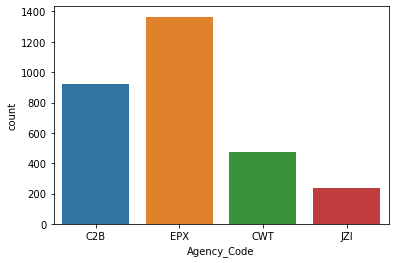

In [27]:
sns.countplot(data = df, x = 'Agency_Code')

<AxesSubplot:xlabel='Agency_Code', ylabel='Sales'>

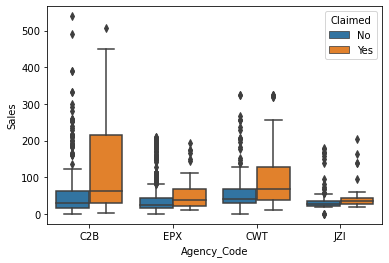

In [28]:
sns.boxplot(data = df, x='Agency_Code',y='Sales', hue='Claimed')

<AxesSubplot:xlabel='Type', ylabel='count'>

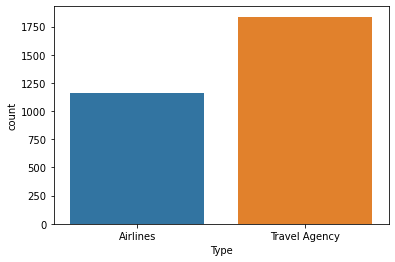

In [29]:
sns.countplot(data = df, x = 'Type')

<AxesSubplot:xlabel='Type', ylabel='Sales'>

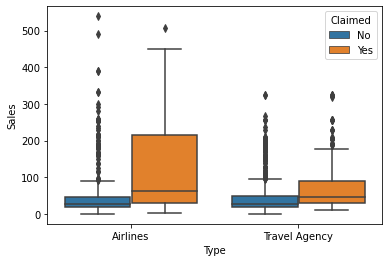

In [30]:
sns.boxplot(data = df, x='Type',y='Sales', hue='Claimed')

<AxesSubplot:xlabel='Channel', ylabel='count'>

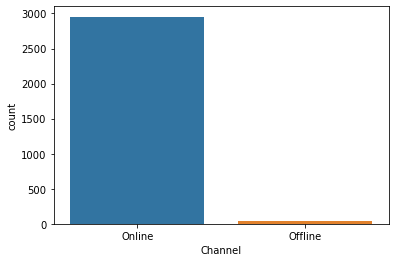

In [31]:
sns.countplot(data = df, x = 'Channel')

<AxesSubplot:xlabel='Channel', ylabel='Sales'>

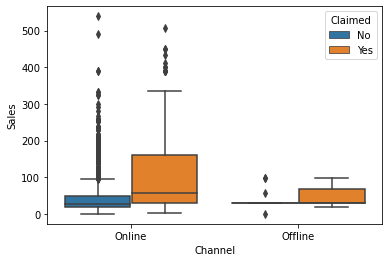

In [32]:
sns.boxplot(data = df, x='Channel',y='Sales', hue='Claimed')

<AxesSubplot:xlabel='Product Name', ylabel='count'>

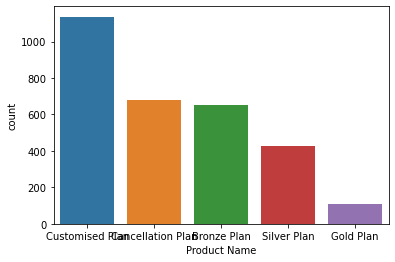

In [33]:
sns.countplot(data = df, x = 'Product Name')

<AxesSubplot:xlabel='Product Name', ylabel='Sales'>

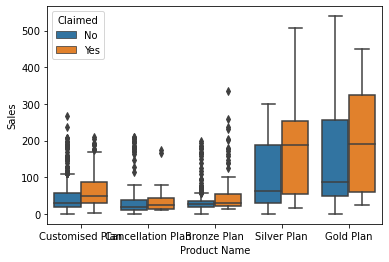

In [34]:
sns.boxplot(data = df, x='Product Name',y='Sales', hue='Claimed')

<AxesSubplot:xlabel='Destination', ylabel='count'>

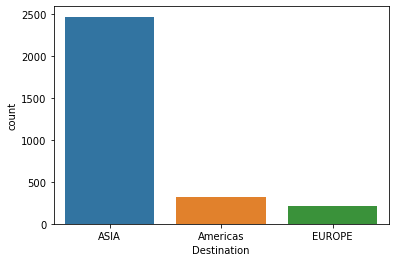

In [35]:
sns.countplot(data = df, x = 'Destination')

<AxesSubplot:xlabel='Destination', ylabel='Sales'>

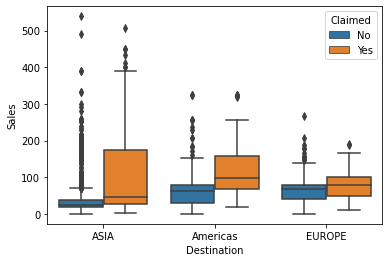

In [36]:
sns.boxplot(data = df, x='Destination',y='Sales', hue='Claimed')

In [20]:
df['Agency_Code'].value_counts()

EPX    1365
C2B     924
CWT     472
JZI     239
Name: Agency_Code, dtype: int64

In [21]:
df['Type'].value_counts()

Travel Agency    1837
Airlines         1163
Name: Type, dtype: int64

In [22]:
df['Claimed'].value_counts()

No     2076
Yes     924
Name: Claimed, dtype: int64

In [23]:
df['Channel'].value_counts()

Online     2954
Offline      46
Name: Channel, dtype: int64

In [24]:
df['Product Name'].value_counts()

Customised Plan      1136
Cancellation Plan     678
Bronze Plan           650
Silver Plan           427
Gold Plan             109
Name: Product Name, dtype: int64

In [25]:
df['Destination'].value_counts()

ASIA        2465
Americas     320
EUROPE       215
Name: Destination, dtype: int64

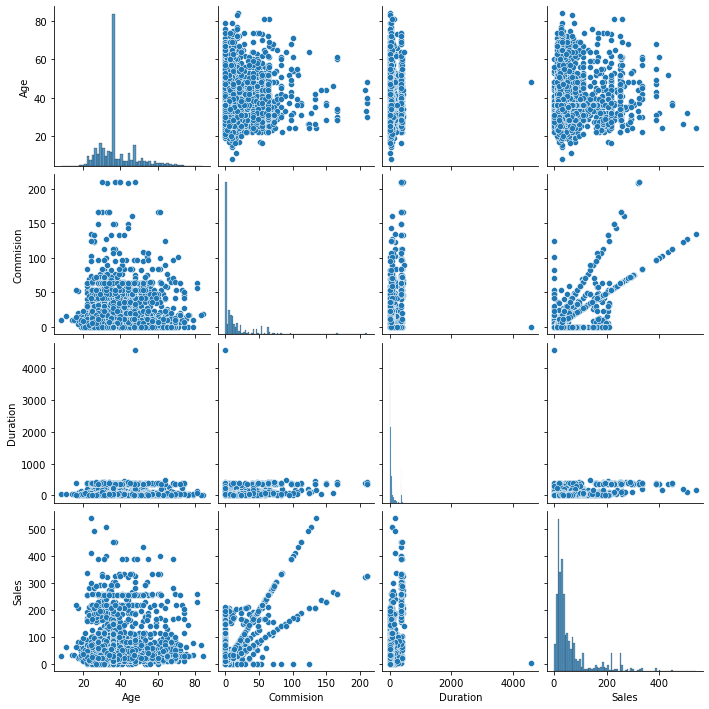

In [37]:
# Checking pairwise distribution of the continuous variables
sns.pairplot(df[['Age', 'Commision', 
    'Duration', 'Sales']])

<AxesSubplot:>

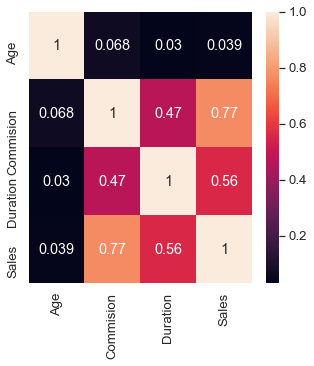

In [26]:
plt.figure(figsize=(5,5))
sns.set(font_scale=1.2)
sns.heatmap(df[['Age', 'Commision', 
    'Duration', 'Sales']].corr(), annot=True)

In [39]:
# Converting all objects to categorical codes

In [5]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        df[feature] = pd.Categorical(df[feature]).codes

feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [35]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


In [6]:
df.Claimed.value_counts(normalize=True)

0    0.692
1    0.308
Name: Claimed, dtype: float64

In [7]:
# 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network
# Extracting the target column into separate vectors for training set and test set

In [8]:
X = df.drop("Claimed", axis=1)

y = df.pop("Claimed")

X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


In [121]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [122]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (2100, 9)
X_test (900, 9)
train_labels (2100,)
test_labels (900,)


In [123]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini'],
    'max_depth': [4,5,6],
    'min_samples_leaf': [30,35,40], 
    'min_samples_split': [75,90,105],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search= GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 10)

In [124]:
grid_search.fit(X_train, train_labels)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 30, 'min_samples_split': 75}


DecisionTreeClassifier(max_depth=4, min_samples_leaf=30, min_samples_split=75,
                       random_state=1)

In [125]:
from sklearn import tree

train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid, out_file= tree_regularized ,
                                feature_names = list(X_train),
                                class_names = list(train_char_label))

tree_regularized.close()
dot_data

In [126]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], 
                    index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.609996
Sales         0.252758
Product Name  0.077916
Commision     0.022955
Duration      0.022666
Type          0.007547
Age           0.006162
Channel       0.000000
Destination   0.000000


In [127]:
#Predicting on Training and Test dataset
ytrain_predict= best_grid.predict(X_train)
ytest_predict= best_grid.predict(X_test)

In [128]:
# getting the Predicted Classes and Probs
ytest_predict
ytest_predict_prob=best_grid.predict_proba(X_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.935714,0.064286
1,0.432432,0.567568
2,0.432432,0.567568
3,0.184834,0.815166
4,0.937143,0.062857


AUC: 0.827


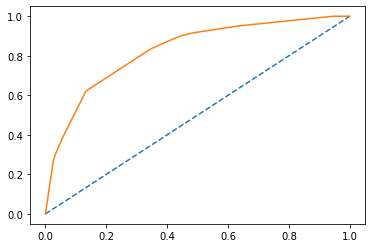

In [129]:
# Training data

# predict probabilities
probs = best_grid.predict_proba(X_train)
probs = probs[:, 1]
cart_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % cart_train_auc)
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr)

AUC: 0.790


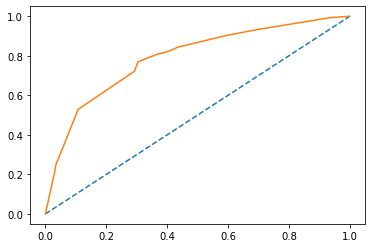

In [130]:
probs = best_grid.predict_proba(X_test)
probs = probs[:, 1]
cart_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % cart_test_auc)
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr)

In [131]:
# Confusion Matrix training data

confusion_matrix(train_labels,ytrain_predict)

array([[1275,  196],
       [ 238,  391]], dtype=int64)

In [132]:
# train data accuracy check
cart_train_acc=best_grid.score(X_train,train_labels)
cart_train_acc

0.7933333333333333

In [133]:
# classification report
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1471
           1       0.67      0.62      0.64       629

    accuracy                           0.79      2100
   macro avg       0.75      0.74      0.75      2100
weighted avg       0.79      0.79      0.79      2100



In [134]:
cart_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df.loc["1"][2],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_precision=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.67
cart_train_recall  0.62
cart_train_f1  0.64


In [135]:
# Confusion Matrix test data
confusion_matrix(test_labels,ytest_predict)

array([[540,  65],
       [139, 156]], dtype=int64)

In [136]:
# test data accuracy check
cart_test_acc=best_grid.score(X_test,test_labels)
cart_test_acc

0.7733333333333333

In [137]:
# classification report test data
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       605
           1       0.71      0.53      0.60       295

    accuracy                           0.77       900
   macro avg       0.75      0.71      0.72       900
weighted avg       0.77      0.77      0.76       900



In [138]:
cart_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.71
cart_test_recall  0.53
cart_test_f1  0.6


In [139]:
# Random Forest Classifier
param_grid = {
    'max_depth': [4,5,6],#20,30,40
    'max_features': [2,3,4,5],## 7,8,9
    'min_samples_leaf': [10,20,35],## 50,100
    'min_samples_split': [30,60,75], ## 60,70
    'n_estimators': [100,200] ## 100,200
}

rfcl = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid_rfcl, cv = 10)

In [140]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [4, 5, 6], 'max_features': [2, 3, 4, 5],
                         'min_samples_leaf': [10, 20, 35],
                         'min_samples_split': [30, 60, 75],
                         'n_estimators': [100, 200]})

In [141]:
grid_search.best_params_

{'max_depth': 6,
 'max_features': 5,
 'min_samples_leaf': 10,
 'min_samples_split': 30,
 'n_estimators': 200}

In [142]:
best_grid = grid_search.best_estimator_

In [143]:
best_grid

RandomForestClassifier(max_depth=6, max_features=5, min_samples_leaf=10,
                       min_samples_split=30, n_estimators=200, random_state=1)

In [144]:
ytrain_predict  = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [145]:
ytest_predict
ytest_predict_prob=best_grid.predict_proba(X_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.802956,0.197044
1,0.466039,0.533961
2,0.449744,0.550256
3,0.244636,0.755364
4,0.937018,0.062982


In [146]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], 
                    index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.352981
Product Name  0.190386
Sales         0.177204
Commision     0.104090
Duration      0.070618
Age           0.054514
Type          0.042167
Destination   0.007344
Channel       0.000697


In [147]:
# Confusion Matrix training data

confusion_matrix(train_labels,ytrain_predict)

array([[1325,  146],
       [ 239,  390]], dtype=int64)

In [148]:
# train data accuracy check
rf_train_acc=best_grid.score(X_train,train_labels)
rf_train_acc

0.8166666666666667

In [149]:
# classification report
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1471
           1       0.73      0.62      0.67       629

    accuracy                           0.82      2100
   macro avg       0.79      0.76      0.77      2100
weighted avg       0.81      0.82      0.81      2100



In [150]:
rf_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.73
rf_train_recall  0.62
rf_train_f1  0.67


Area under the Curve is 0.863221541211704


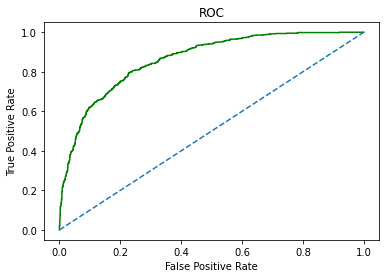

In [151]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1])
print('Area under the Curve is', rf_train_auc)

In [152]:
# Confusion Matrix test data
confusion_matrix(test_labels,ytest_predict)

array([[551,  54],
       [152, 143]], dtype=int64)

In [153]:
# test data accuracy check
rf_test_acc=best_grid.score(X_test,test_labels)
rf_test_acc

0.7711111111111111

In [154]:
# classification report test data
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       605
           1       0.73      0.48      0.58       295

    accuracy                           0.77       900
   macro avg       0.75      0.70      0.71       900
weighted avg       0.76      0.77      0.76       900



In [155]:
rf_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.73
rf_test_recall  0.48
rf_test_f1  0.58


Area under the Curve is 0.822563384227483


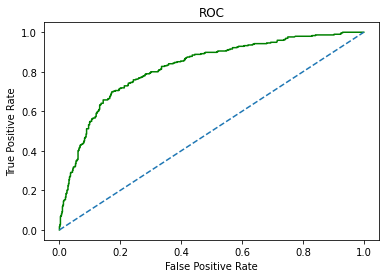

In [156]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1])
print('Area under the Curve is', rf_test_auc)

In [157]:
# N N
sc = StandardScaler() 
X_trains = sc.fit_transform(X_train) 
X_tests = sc.transform (X_test)

In [158]:
param_grid = {
    'hidden_layer_sizes': [100],
    'activation': ['relu'],
    'solver': ['sgd', 'adam'],
    'tol': [0.01,0.01],
    'max_iter' : [1000,2000]
}

nncl = MLPClassifier(random_state=1)

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 10)

In [159]:
grid_search.fit(X_train, train_labels)
grid_search.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': 100,
 'max_iter': 1000,
 'solver': 'adam',
 'tol': 0.01}

In [160]:
best_grid = grid_search.best_estimator_
best_grid

MLPClassifier(hidden_layer_sizes=100, max_iter=1000, random_state=1, tol=0.01)

In [161]:
ytrain_predict  = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [162]:
# Confusion Matrix training data
confusion_matrix(train_labels,ytrain_predict)

array([[1289,  182],
       [ 262,  367]], dtype=int64)

In [163]:
# train data accuracy check
nn_train_acc=best_grid.score(X_train,train_labels)
nn_train_acc

0.7885714285714286

In [164]:
# classification report
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1471
           1       0.67      0.58      0.62       629

    accuracy                           0.79      2100
   macro avg       0.75      0.73      0.74      2100
weighted avg       0.78      0.79      0.78      2100



In [165]:
nn_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.67
nn_train_recall  0.58
nn_train_f1  0.62


Area under the Curve is 0.8158261632688794


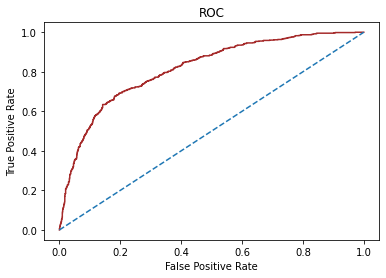

In [166]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='brown')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1])
print('Area under the Curve is', nn_train_auc)

In [167]:
# Confusion Matrix test data
confusion_matrix(test_labels,ytest_predict)

array([[547,  58],
       [154, 141]], dtype=int64)

In [168]:
# test data accuracy check
nn_test_acc=best_grid.score(X_test,test_labels)
nn_test_acc

0.7644444444444445

In [169]:
# classification report test data
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       605
           1       0.71      0.48      0.57       295

    accuracy                           0.76       900
   macro avg       0.74      0.69      0.70       900
weighted avg       0.76      0.76      0.75       900



In [170]:
nn_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.71
nn_test_recall  0.48
nn_test_f1  0.57


AUC is 0.7827903067656534


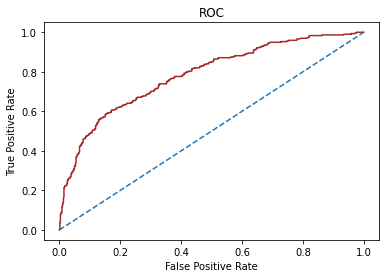

In [171]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='brown')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1])
print('AUC is', nn_test_auc)

In [176]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.79,0.77,0.82,0.77,0.79,0.76
AUC,0.83,0.79,0.86,0.82,0.82,0.78
Recall,0.62,0.53,0.62,0.48,0.58,0.48
Precision,0.67,0.71,0.73,0.73,0.67,0.71
F1 Score,0.64,0.60,0.67,0.58,0.62,0.57
